# Qcodes example with Rohde Schwarz ZN20/8

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

import qcodes as qc

User schema at /Users/jhn/qcodesrc_schema.json not found.User settings won't be validated


In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

In [3]:
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR')

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044102194, firmware:2.84) in 0.56s


To use the VNA we likely want to turn on RF Power, which is off by default for safty in this driver. The driver default to low power but for safety lets set it to -50 dBm. The rf can be turned on and off globally and the power adjusted individually for each channel.

In [4]:
vna.channels.power(-50)
vna.rf_on()

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


The above warning about Multiparameter can be ignored for the most part. It only means that you cannot loop over the multiparameters such as vna.channel.avg

As we have turned on rf power it's likely that the display output is out of scale so lets force a autoscale for all channels

In [5]:
vna.channels.autoscale()

In [6]:
station = qc.Station(vna)

The QCoDes driver for the Rohde Schwarz ZNB(8/20) is setup with num_ports*num_ports channels each containing one trace and reprecenting the standard S parameters (S11, S12, S21, S22 etc). For each S parameter you can define a frequency sweep as and the power of the rf source i.e for s11 sweep from 100 KHz to 6 MHz in 100 steps:

In [7]:
vna.channels.S11.start(100e3)
vna.channels.S11.stop(6e6)
vna.channels.S11.npts(100)

With a power of -30 dBm

In [8]:
vna.channels.S11.power(-30)

Now we can meassure a frequency trace, first remembering to turn on the rf source. By default this produces a dB magnitude scan.

In [8]:
vna.rf_on()
data = qc.Measure(vna.channels.S11.trace).run()

DataSet:
   location = 'data/2017-06-27/#073_{name}_10-40-43'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (10,)
acquired at 2017-06-27 10:40:45


<IPython.core.display.Javascript object>


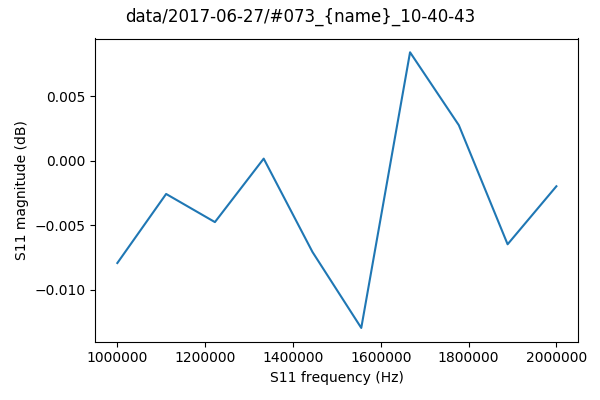

In [9]:
plot = qc.MatPlot()
plot.add(data.VNA_S11_trace, subplot=1)
plot.tight_layout()

We can also define a frequency trace by setting the span and center frequency. 200 KHz windows centered around 1 MHZ

In [10]:
vna.channels.S11.span(200e3)
vna.channels.S11.center(1e6)
vna.channels.S11.npts(100)

DataSet:
   location = 'data/2017-06-27/#076_{name}_10-42-00'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (100,)
acquired at 2017-06-27 10:42:12


<IPython.core.display.Javascript object>


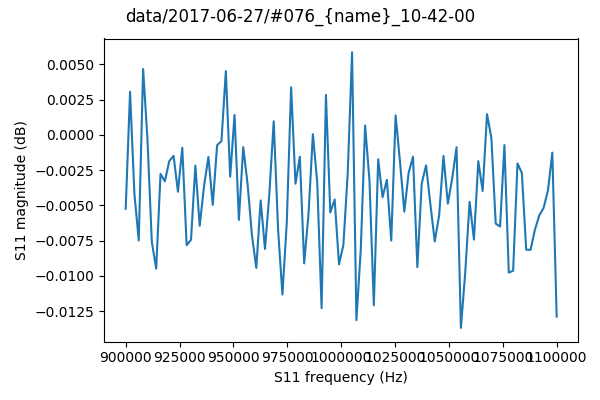

In [13]:
data = qc.Measure(vna.channels.S11.trace).run()
plot = qc.MatPlot()
plot.add(data.VNA_S11_trace)
plot.tight_layout()

We can also measure the linear magniture.

DataSet:
   location = 'data/2017-06-27/#077_{name}_10-42-47'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (100,)
acquired at 2017-06-27 10:42:59


<IPython.core.display.Javascript object>


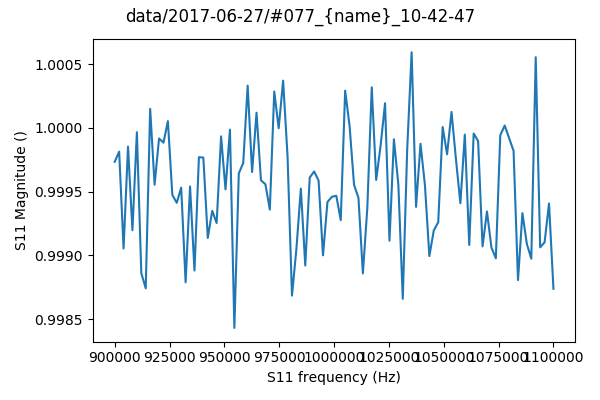

In [15]:
vna.rf_on()
vna.channels.S11.format('Linear Magnitude')
data = qc.Measure(vna.channels[0].trace).run()
plot = qc.MatPlot(data.VNA_S11_trace)

Or the real part

DataSet:
   location = 'data/2017-06-27/#078_{name}_10-43-24'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (100,)
acquired at 2017-06-27 10:43:36


<IPython.core.display.Javascript object>


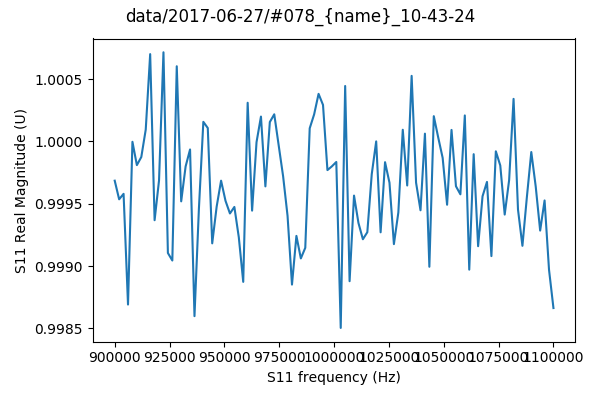

In [16]:
vna.rf_on()
vna.channels.S11.format('Real')
data = qc.Measure(vna.channels[0].trace).run()
plot = qc.MatPlot(data.VNA_S11_trace)

Or imaginary

DataSet:
   location = 'data/2017-06-27/#079_{name}_10-43-50'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (100,)
acquired at 2017-06-27 10:44:02


<IPython.core.display.Javascript object>


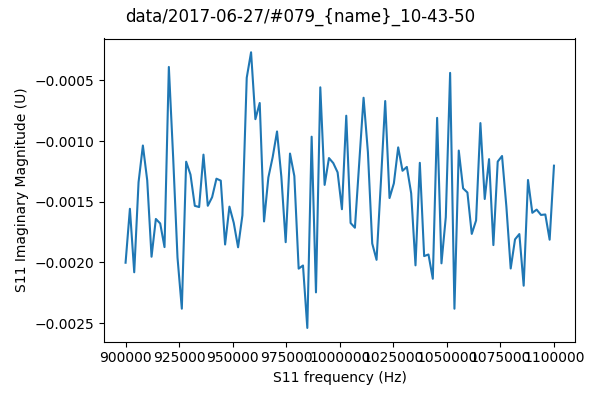

In [18]:
vna.rf_on()
vna.channels.S11.format('Imaginary')
data = qc.Measure(vna.channels[0].trace).run()
plot = qc.MatPlot(data.VNA_S11_trace)

However, the QCoDeS dataset does not currently support complex number so if you want to capture both the magnitude and phase you should use full_trace which returns magnitude and phase as two arrays

In [20]:
# First set format back for consistency
vna.channels.S11.format('dB')

In [21]:
vna.rf_on()
data = qc.Measure(vna.channels.S11.full_trace).run()

DataSet:
   location = 'data/2017-06-27/#080_{name}_10-46-00'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | frequency_set     | frequency    | (100,)
   Measured | VNA_S11_magnitude | magnitude    | (100,)
   Measured | VNA_S11_phase     | phase        | (100,)
acquired at 2017-06-27 10:46:12


<IPython.core.display.Javascript object>


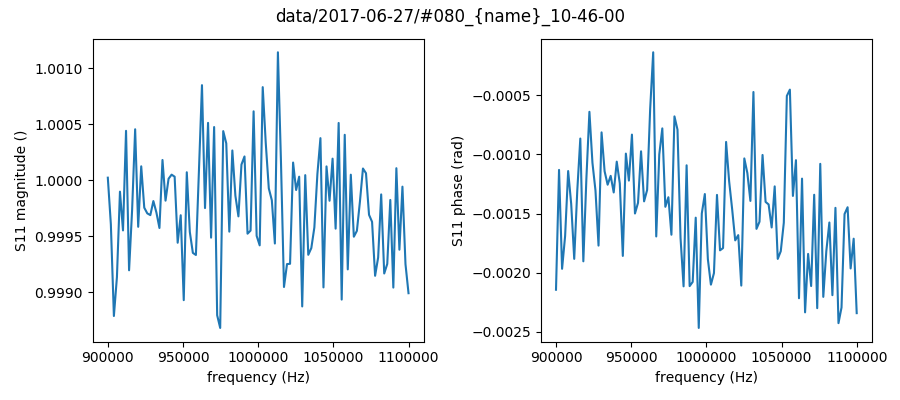

In [26]:
plot = qc.MatPlot(subplots=(1,2))
plot.add(data.VNA_S11_magnitude, subplot=1)
plot.add(data.VNA_S11_phase, subplot=2)
plot.tight_layout()

We can display all 4/16 ... S parameters in a split view on the VNA display.

In [27]:
vna.display_sij_split()

Or we can display all parameters in one view.

In [28]:
vna.display_single_window()

Or a grid of our own choice

In [31]:
vna.display_grid(2,1)

In [32]:
vna.display_sij_split()

It is possible to switch the display of traces on and off

In [33]:
vna.update_display_off()

In [34]:
vna.update_display_on()

Control if data should be captured continiously when not capturing traces

In [35]:
vna.cont_meas_off()

In [36]:
vna.cont_meas_on()

And switch the rf output on and off

In [37]:
vna.rf_on()

In [38]:
vna.rf_off()

Doing a 2D sweep is supported too

In [43]:
vna.rf_on()
vna.channels.S11.start(100e3)
vna.channels.S11.stop(200e3)
vna.channels.S11.npts(100)
vna.channels.S11.avg(10)
data1 = qc.Loop(vna.channels.S11.power.sweep(-50,-30,1)).each(vna.channels.S11.trace).run()

Started at 2017-06-27 10:52:55
DataSet:
   location = 'data/2017-06-27/#083_{name}_10-52-55'
   <Type>   | <array_id>        | <array.name> | <array.shape>
   Setpoint | VNA_S11_power_set | power        | (21,)
   Measured | VNA_S11_trace     | trace        | (21, 100)
Finished at 2017-06-27 10:53:02


<IPython.core.display.Javascript object>


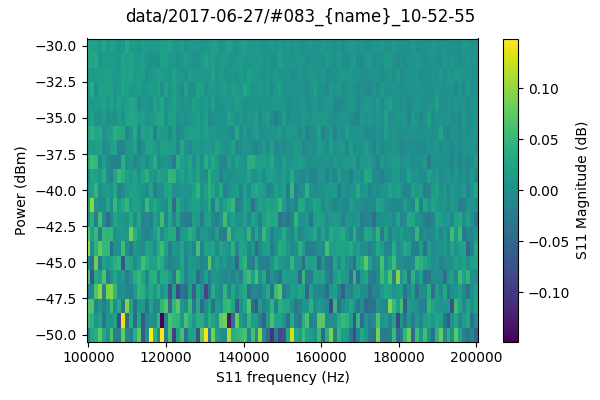

In [44]:
plot = qc.MatPlot()
plot.add(data1.VNA_S11_trace, subplot=1)
plot.tight_layout()

We can also capture db Traces for all channels in one QCoDeS measurement. Notice how start/stop number of points and number of averages can be set globally for all channels. 

In [45]:
vna.channels.start(9e3)
vna.channels.stop(8.5e9)
vna.channels.npts(100)
vna.channels.avg(100)
data = qc.Measure(vna.channels.trace).run()

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


DataSet:
   location = 'data/2017-06-27/#084_{name}_10-53-08'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | S44 frequency_set | S44 frequency | (100,)
   Measured | VNA_S11_trace     | VNA_S11_trace | (100,)
   Measured | VNA_S12_trace     | VNA_S12_trace | (100,)
   Measured | VNA_S13_trace     | VNA_S13_trace | (100,)
   Measured | VNA_S14_trace     | VNA_S14_trace | (100,)
   Measured | VNA_S21_trace     | VNA_S21_trace | (100,)
   Measured | VNA_S22_trace     | VNA_S22_trace | (100,)
   Measured | VNA_S23_trace     | VNA_S23_trace | (100,)
   Measured | VNA_S24_trace     | VNA_S24_trace | (100,)
   Measured | VNA_S31_trace     | VNA_S31_trace | (100,)
   Measured | VNA_S32_trace     | VNA_S32_trace | (100,)
   Measured | VNA_S33_trace     | VNA_S33_trace | (100,)
   Measured | VNA_S34_trace     | VNA_S34_trace | (100,)
   Measured | VNA_S41_trace     | VNA_S41_trace | (100,)
   Measured | VNA_S42_trace     | VNA_S42_trace | (100,)
   Measured | VNA_S

Here we plot the parameters on 2 different scales assuming that no DUT is connected the single port parameters will be much different from the other parametes

<IPython.core.display.Javascript object>


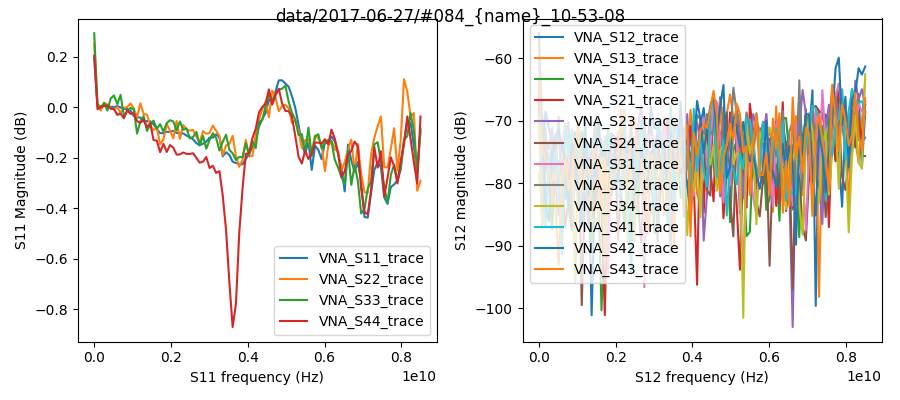

In [46]:
plot = qc.MatPlot(subplots=2)
for i in range(1,vna.num_ports()+1):
    for j in range(1,vna.num_ports()+1):
        if i == j:
            subplot = 1
        else:
            subplot = 2
        plot.add(data.arrays['VNA_S{}{}_trace'.format(i,j)], subplot=subplot)
plot.fig.axes[0].legend()
plot.fig.axes[1].legend()
plot.fig.tight_layout()

Slicing the channels to capture a subset is also supported, For example here we messure S11 and S12

In [48]:
data = qc.Measure(vna.channels[0:2].trace).run()

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


DataSet:
   location = 'data/2017-06-27/#085_{name}_10-55-02'
   <Type>   | <array_id>        | <array.name>  | <array.shape>
   Setpoint | S12 frequency_set | S12 frequency | (100,)
   Measured | VNA_S11_trace     | VNA_S11_trace | (100,)
   Measured | VNA_S12_trace     | VNA_S12_trace | (100,)
acquired at 2017-06-27 10:55:06


<IPython.core.display.Javascript object>


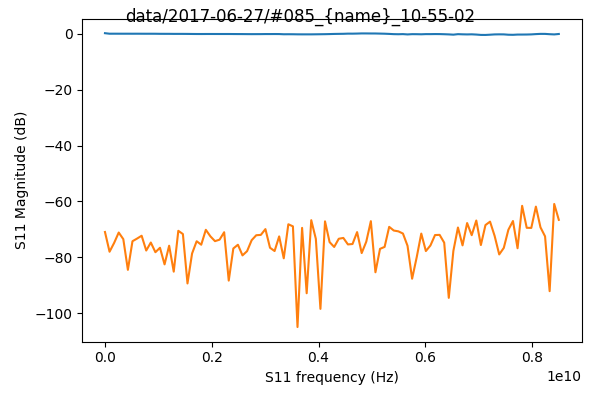

In [50]:
plot = qc.MatPlot(subplots=1)
plot.add(data.arrays['VNA_S11_trace'])
plot.add(data.arrays['VNA_S12_trace'])
plot.fig.tight_layout()

## Without predefined channels


It is also possible to construct a VNA without predefined channels. You will likely want to remove any exising
channels manually or by a reset before doing this. The driver does not automatically call reset as this turns on rf at a power of -10 dBm

In [51]:
vna.close()
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR', init_s_params=False)
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044102194, firmware:2.84) in 0.02s


Then we can add a channel, messuring with only one channel may speed up data acquisition.

In [52]:
vna.add_channel('S22')

In [53]:
vna.cont_meas_on()
vna.display_single_window()

In [55]:
vna.rf_on()
data = qc.Measure(vna.channels.S22.trace).run()

DataSet:
   location = 'data/2017-06-27/#086_{name}_10-55-27'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S22_trace | trace        | (100,)
acquired at 2017-06-27 10:55:29


We can also clear the channels in an existing instrument

In [56]:
vna.clear_channels()

## Benchmark

First lets compare capturing S11 traces with the old singe channel driver

In [57]:
vna.close()
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR', init_s_params=True)
vna.rf_on()
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044102194, firmware:2.84) in 0.36s


In [58]:
vna.channels.S11.print_readable_snapshot(update=True)

VNA_S11:
	parameter    value
--------------------------------------------------------------------------------
avg           :	100 
bandwidth     :	10000 (Hz)
center        :	1.5e+06 
format        :	dB 
full_trace    :	([0.9970356535738236, 1.000118710363188, 0.9976683076594087, ...
npts          :	10 
power         :	-50 (dBm)
span          :	1e+06 
start         :	1e+06 
stop          :	2e+06 
trace         :	[-0.00951918  0.00695515  0.01625906  0.00123664  0.00078625 ...
vna_parameter :	S11 


Starting with a simple trace with few points and a small number of averages

In [59]:
vna.rf_on()
vna.channels.npts(10)
vna.channels.avg(1)
vna.channels.start(9e3)
vna.channels.stop(100e3)

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


In [60]:
%%time
data = qc.Measure(vna.channels.S11.trace).run()

DataSet:
   location = 'data/2017-06-27/#087_{name}_10-56-42'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (10,)
acquired at 2017-06-27 10:56:42
CPU times: user 47 ms, sys: 5.08 ms, total: 52 ms
Wall time: 90 ms


Now lets try with a longer freq axis and more averages

In [61]:
vna.channels.npts(1000)
vna.channels.avg(1000)
vna.channels.start(9e3)
vna.channels.stop(8.5e9)

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


In [62]:
%%time
data = qc.Measure(vna.channels.S11.trace).run()

DataSet:
   location = 'data/2017-06-27/#088_{name}_10-56-45'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (1000,)
acquired at 2017-06-27 10:59:01
CPU times: user 230 ms, sys: 149 ms, total: 379 ms
Wall time: 2min 16s


Lets now try with only one channel added

In [63]:
vna.clear_channels()
vna.add_channel('S11')

In [64]:
vna.rf_on()
vna.channels.npts(10)
vna.channels.avg(1)
vna.channels.start(9e3)
vna.channels.stop(100e3)

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


In [65]:
%%time
data = qc.Measure(vna.channels.S11.trace).run()

DataSet:
   location = 'data/2017-06-27/#089_{name}_10-59-57'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (10,)
acquired at 2017-06-27 10:59:57
CPU times: user 14.6 ms, sys: 4.09 ms, total: 18.7 ms
Wall time: 28.6 ms


As can be seen this is significantly faster than with all the channels added

In [66]:
vna.channels.npts(1000)
vna.channels.avg(1000)
vna.channels.start(9e3)
vna.channels.stop(8.5e9)

/Users/jhn/src/Qcodes/qcodes/instrument/parameter.py:634: UserWarning: MultiParameters do not fully support set at this time.
  warnings.warn('MultiParameters do not fully support set '


But for a long trace the relative difference is much smaller

In [67]:
%%time
data = qc.Measure(vna.channels.S11.trace).run()

DataSet:
   location = 'data/2017-06-27/#090_{name}_11-00-04'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S11_trace | trace        | (1000,)
acquired at 2017-06-27 11:02:20
CPU times: user 198 ms, sys: 139 ms, total: 337 ms
Wall time: 2min 15s
